In [7]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Use inline so our visualizations display in notebook
%matplotlib inline

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [9]:
# Load in the titanic data set.
df = pd.read_csv('./data/titanic.csv')
df.sample(5)


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S


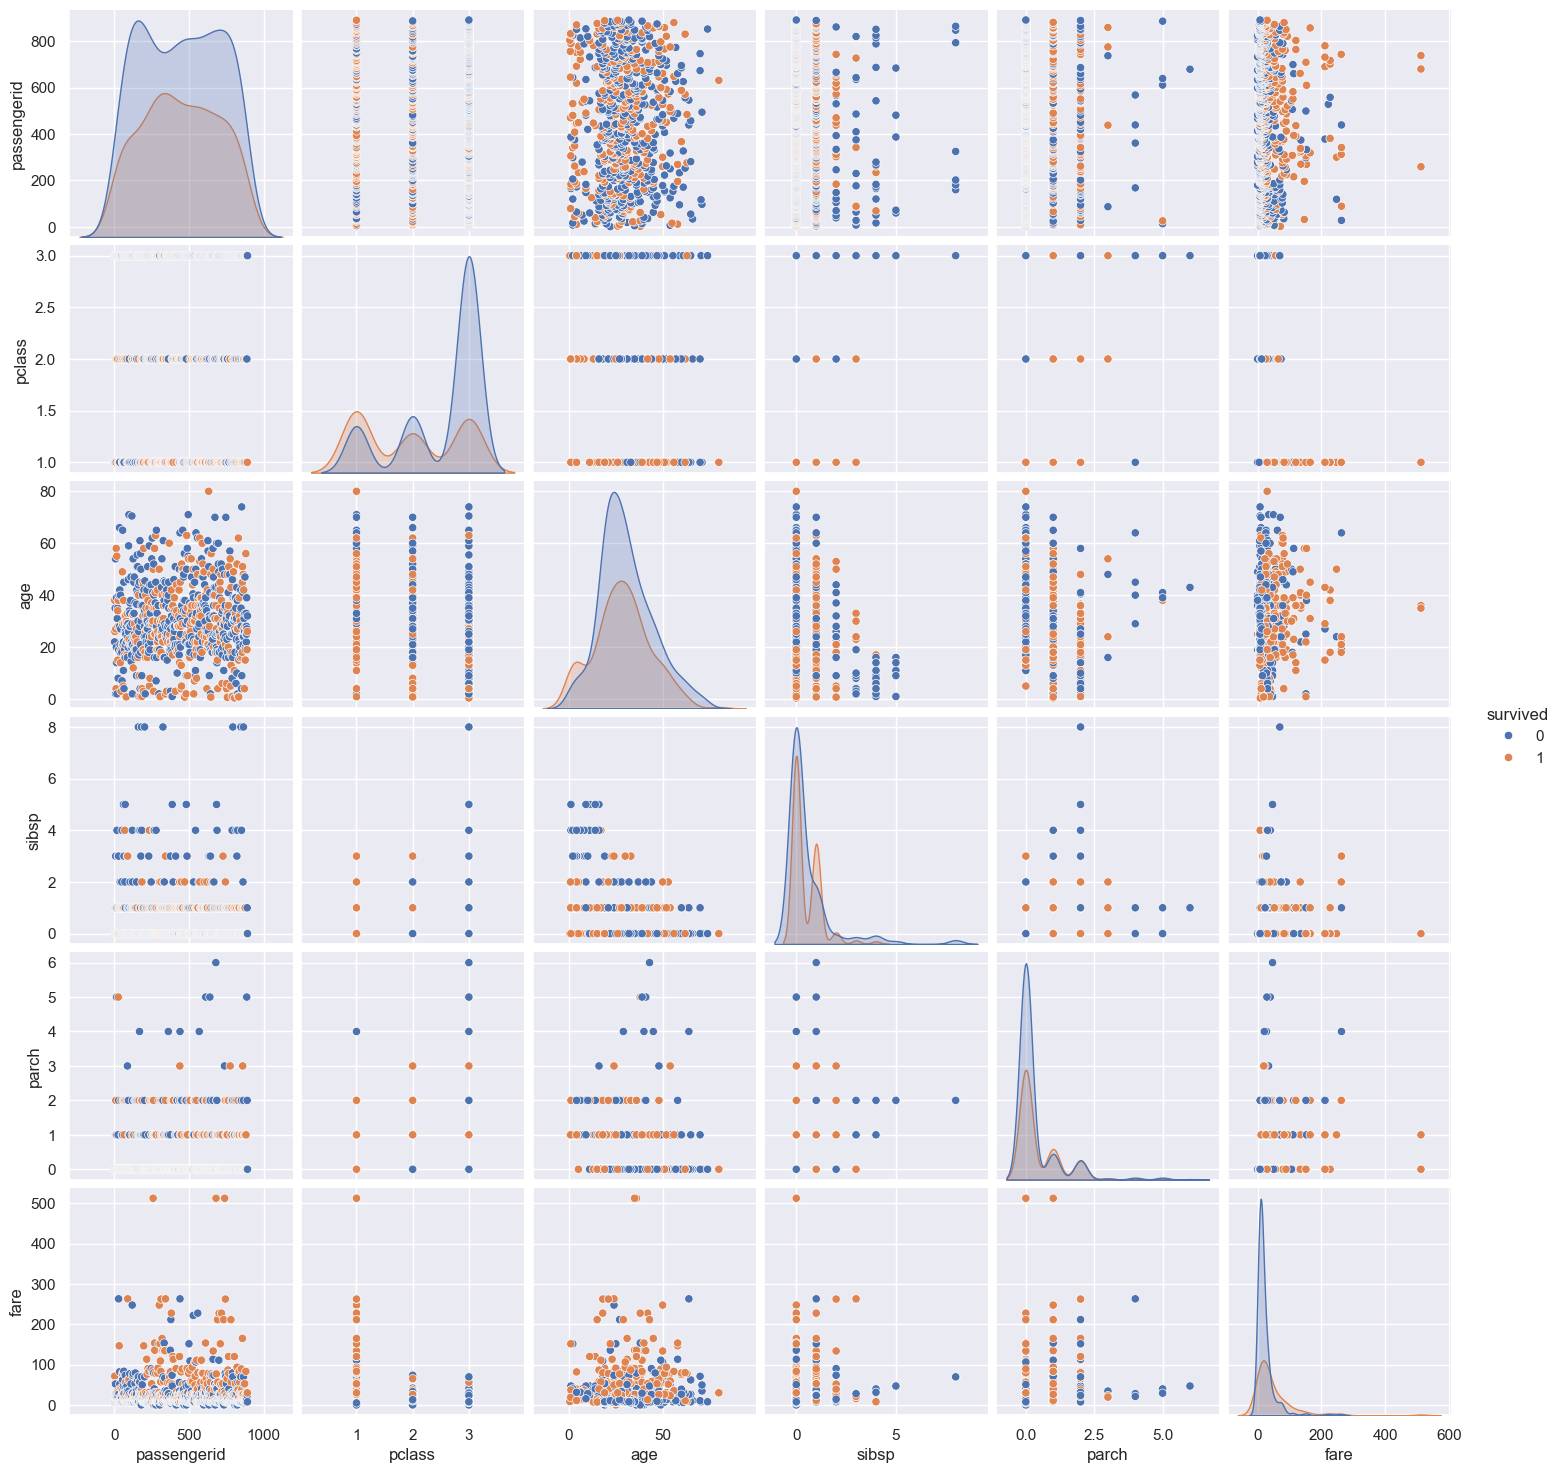

In [8]:
# Visualize all the data using sns.pairplot
sns.pairplot(df, hue='survived')

In [10]:
# Check for null values
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

In [13]:
# Fill age null values with -999
df['age'].fillna(-999, inplace=True)


In [30]:
# 1. Convert to numerical values if need be by using `pd.get_dummies()`
df = pd.get_dummies(df, columns=['sex', 'embarked','pclass'], drop_first=True)

In [31]:
df.sample(5)

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3
456,457,0,"Millet, Mr. Francis Davis",65.0,0,0,13509,26.5500,E38,True,False,True,False,False
306,307,1,"Fleming, Miss. Margaret",-999.0,0,0,17421,110.8833,NaN,False,False,False,False,False
163,164,0,"Calic, Mr. Jovo",17.0,0,0,315093,8.6625,NaN,True,False,True,False,True
241,242,1,"Murphy, Miss. Katherine ""Kate""",-999.0,1,0,367230,15.5000,NaN,False,True,False,False,True
363,364,0,"Asim, Mr. Adola",35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,True,False,True,False,True


In [34]:
# 2. Create a list of the features we are going to use.
selected_features = ['fare','age','sibsp','sex_male', 'embarked_Q', 'embarked_S', 'pclass_2', 'pclass_3', 'parch']


In [35]:
# Define our `X` and `y`

X = df[selected_features]

y = df['survived']

In [37]:
# Split our data into trainig and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=27)

print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', X_test.shape)

Lenght of our Training data: (712, 9) 
Length of our Testing data: (179, 9)


# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [38]:
# For our first pass, initialize our model with `max_depth=2`.

model = DecisionTreeClassifier(max_depth=2)

In [39]:
# Fit our model with our training data. 

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [40]:
# Make predictions of our testing data. 

y_pred = model.predict(X_test)

In [43]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test,y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test,y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.782123
Precision Score: 0.727273
Recall Score: 0.695652
F1 Score: 0.711111
AUC Score: 0.839130


# Visualize your tree

# Picking the right parameters...

# Parameter tuning of your Decision Tree using GridSearch or RandomizedSearch

### For assistance on this, look at Steves TA Tips code in `TA-Tips/random_forest_tuning.ipynb`


1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


In [44]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [50]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV
params = { 
    'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': [3,4,5,7,8,10], 'max_leaf_nodes':[4,5,6,7,8,9,10] }

In [51]:
# 1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv =  GridSearchCV(model, param_grid=params )

In [52]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [4, 5, 6, 7, 8, 9, 10]})

In [53]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print( grid_search_cv.best_estimator_ )

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=7)


In [57]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=7)

model.fit(X_train, y_train)

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test,y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.787709
Precision Score: 0.738462
Recall Score: 0.695652
F1 Score: 0.716418
AUC Score: 0.845323


In [58]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
3,0.697817,sex_male
6,0.141304,pclass_2
0,0.082927,fare
7,0.077952,pclass_3
1,0.000000,age
2,0.000000,sibsp
4,0.000000,embarked_Q
5,0.000000,embarked_S
8,0.000000,parch


# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [73]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
model = RandomForestClassifier()
params = {
    'criterion': ['gini', 'entropy'], 
    'n_estimators': [75,100,125],
    'max_depth': [3,5,7,10],
    'max_features': ['sqrt', 'log2','auto'],
    'max_leaf_nodes':[5,7,9,10]
}

In [74]:
# 1. Initalize your GridSearchCV or RandomizedSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search = GridSearchCV(model, params)


In [75]:
# 1. Fit your GridSearchCV with your training data. 
grid_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'max_leaf_nodes': [5, 7, 9, 10],
                         'n_estimators': [75, 100, 125]})

In [76]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(grid_search.best_estimator_)




RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=9, n_estimators=75)


In [79]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score. 
model = grid_search.best_estimator_


# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test,y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test,y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test,y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test,y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.798883
Precision Score: 0.800000
Recall Score: 0.637681
F1 Score: 0.709677
AUC Score: 0.866337


In [80]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

sex_male      0.514287
fare          0.153236
pclass_3      0.151037
age           0.063858
sibsp         0.037372
parch         0.032103
pclass_2      0.020320
embarked_S    0.019651
embarked_Q    0.008137
dtype: float64

# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above %88.8889?
* What was your most important feature?


In [104]:
df = pd.read_csv('data/ny-vs-sf-houses.csv')
df.sample(5)

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
358,1,3.0,3.0,1100000,1925,2633,418,91
224,1,1.0,1.0,550000,1982,724,760,24
51,0,1.0,1.0,1849000,1920,1400,1321,5
415,1,2.0,1.0,995000,1908,600,1658,36
323,1,3.0,1.5,699000,1910,1625,430,94


In [84]:
df.isnull().sum()

in_sf             0
beds              0
bath              0
price             0
year_built        0
sqft              0
price_per_sqft    0
elevation         0
dtype: int64

In [83]:
df.duplicated().sum()

33

In [85]:
df.drop_duplicates(inplace=True)

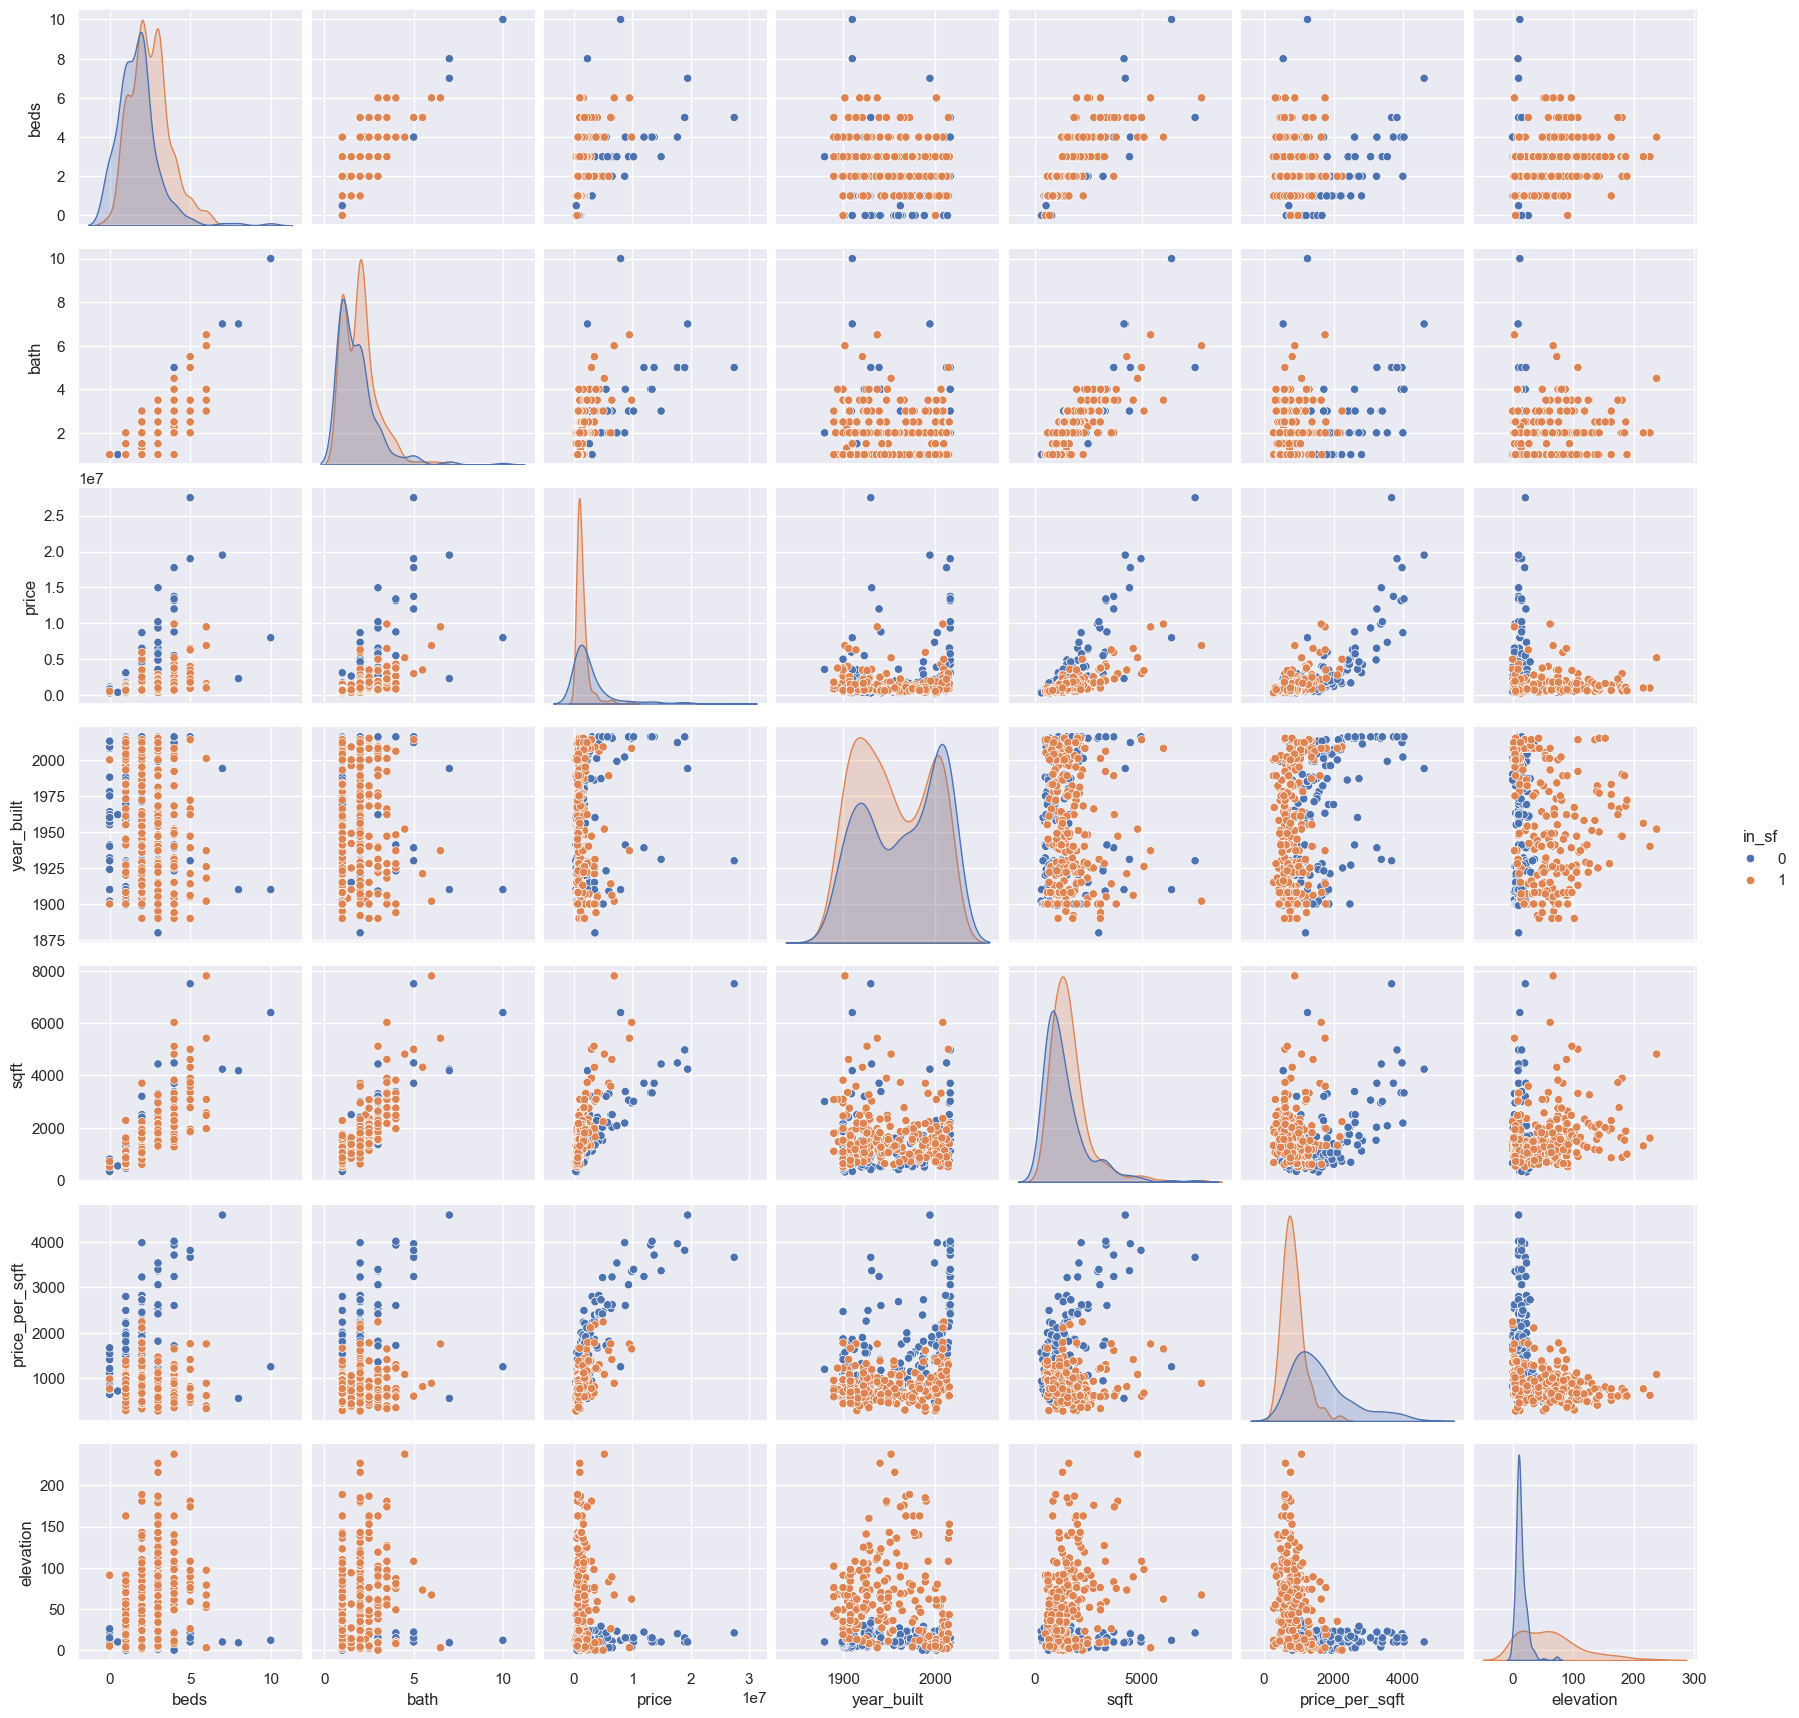

In [106]:
sns.pairplot(df, hue='in_sf')

In [107]:
features = ['beds', 'bath', 'price', 'year_built', 'sqft','price_per_sqft', 'elevation']
X = df[features]
y = df['in_sf']

In [108]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, stratify=y)
print("Shape of X_train: ", X_train.shape, '\nShape of y_test: ', y_test.shape)

Shape of X_train:  (393, 7) 
Shape of y_test:  (99,)


In [109]:
model = RandomForestClassifier()
params = {
    'criterion': ['gini', 'entropy'], 
    'n_estimators': [75,100,125],
    'max_depth': [3,5,7,10],
    'max_features': ['sqrt', 'log2','auto'],
    'max_leaf_nodes':[5,7,9,10]
}

grid_search = GridSearchCV(model, params)
grid_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'max_leaf_nodes': [5, 7, 9, 10],
                         'n_estimators': [75, 100, 125]})

In [110]:
model = grid_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test,y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test,y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test,y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test,y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.888889
Precision Score: 0.877193
Recall Score: 0.925926
F1 Score: 0.900901
AUC Score: 0.950617


# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the posotive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)

In [ ]:
df = pd.read_csv('data/adult_income.csv')
df.head()